In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from sbc import SBC, rmse_mean, rmse_averaged
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams["figure.figsize"] = "20, 10"

In [3]:
num_reps = 10000
data = dict(J=8, K=2, sigma = [15, 10, 16, 11,  9, 11, 10, 18])
sbc = SBC("../code/gen_8schools.stan", "../code/8schools.stan",

             dict(chains=1, iter=1100, warmup=1000), stats=[rmse_mean, rmse_averaged])
reps = sbc.run(data, num_reps)
reps.to_csv(str(sbc) + ".csv")

Using cached StanModel
Using cached StanModel
Using  24  cores.


/home/sean/vsbc/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/sean/vsbc/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/sean/vsbc/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/sean/vsbc/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issub

run took 243.31674766540527s


In [4]:
reps.head()

,mu_n_eff,mu_order_stat,mu_prior,mu_rhat,mu_rmse_averaged,mu_rmse_mean,tau_n_eff,tau_order_stat,tau_prior,tau_rhat,tau_rmse_averaged,tau_rmse_mean,theta_n_eff,theta_order_stat,theta_prior,theta_rhat,theta_rmse_averaged,theta_rmse_mean
0,100.0,98,-4.929305,0.997090,7.692210,6.953882,100.0,93,2.243735,1.018388,4.526148,3.616654,"[100.0, 94.0, 65.0, 100.0, 100.0, 71.0, 71.0, ...","[94, 65, 98, 98, 97, 72, 80, 93]","[-6.016123707682268, -1.8805191802782897, -4.1...","[1.045135582615253, 0.9902355918562057, 1.0050...",26.629293,"[8.852983774309878, 4.7173792469059, 7.0000222..."
1,100.0,8,5.715224,0.991016,6.126596,4.918640,100.0,0,9.169282,0.997544,6.082159,5.679118,"[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100...","[78, 68, 77, 38, 1, 12, 1, 43]","[-5.007475845092317, -0.3081024040860152, -3.3...","[1.0023263260492055, 0.9933519949599755, 0.992...",22.657220,"[6.0343087469543155, 1.3349353059480134, 4.375..."
2,100.0,50,-0.646733,0.990156,3.211715,0.095391,100.0,13,6.001963,0.990606,3.925189,3.240480,"[100.0, 100.0, 100.0, 100.0, 94.0, 100.0, 100....","[86, 0, 95, 15, 94, 13, 74, 13]","[-6.759835420026633, 8.510909298035367, -6.525...","[0.9914340946647286, 0.9902784919005728, 0.989...",21.179769,"[6.084184028419844, 9.186560689642155, 5.84941..."
3,100.0,88,-5.637770,0.990125,5.666595,4.505094,51.0,39,5.104206,0.998627,2.857925,0.992576,"[89.0, 100.0, 100.0, 100.0, 100.0, 65.0, 100.0...","[85, 81, 50, 49, 97, 57, 88, 78]","[-8.050461761736795, -3.703311299633374, -1.34...","[1.0162032644177093, 0.9905011323258114, 0.992...",20.218864,"[6.9013568223177035, 2.554206360214282, 0.1939..."
4,72.0,96,-7.084594,0.996759,6.123629,5.257099,100.0,12,6.424805,0.990828,4.181832,3.107334,"[100.0, 100.0, 91.0, 95.0, 100.0, 100.0, 86.0,...","[90, 92, 90, 96, 88, 64, 81, 50]","[-6.673213800241708, -11.276464391402932, -7.0...","[0.9909900893264033, 0.9906094266694454, 0.989...",20.598659,"[4.786091356446108, 9.389341947607331, 5.16451..."


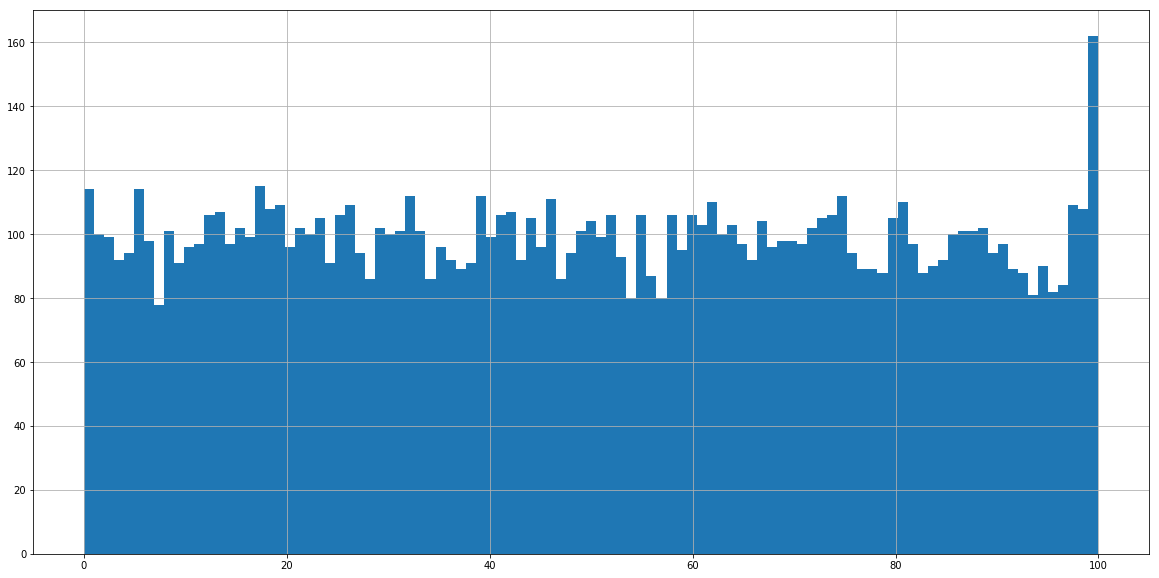

In [16]:
reps["tau_order_stat"].hist(bins=101)
plt.savefig("sbac_8schoolsncp_tau_100.eps")

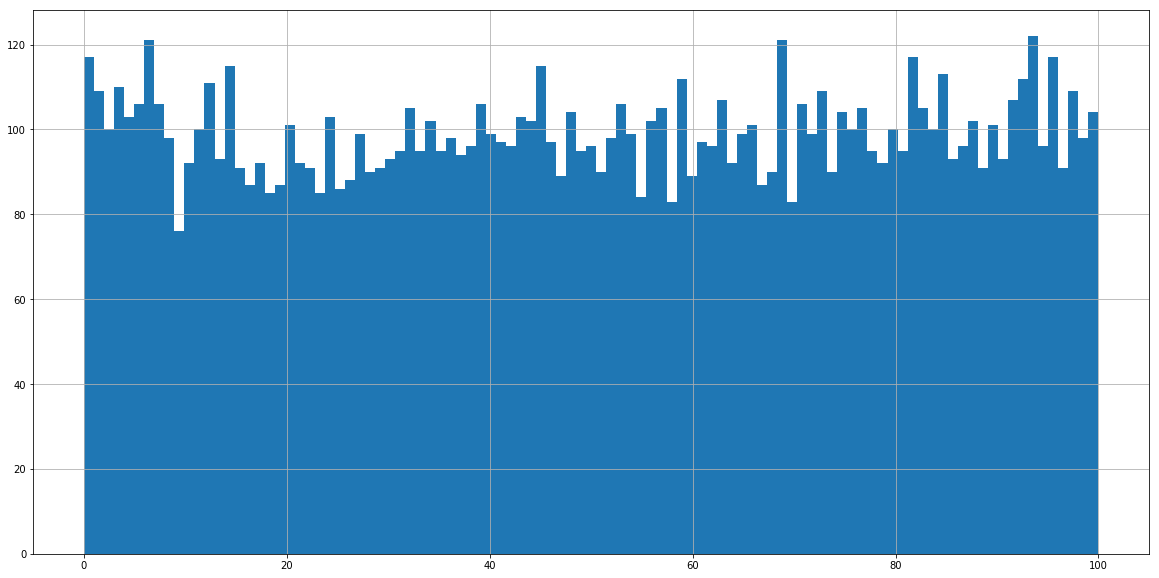

In [17]:
#reps["theta_order_stat"] = reps["theta_order_stat"].apply(lambda s: list(map(int, s[1:-1].split())))
pd.Series(([x[0] for x in reps["theta_order_stat"]])).hist(bins=101)
plt.savefig("sbac_8schoolsncp_theta1_100.eps")